<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Sales_Property_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [9]:
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
data=("/content/drive/My Drive/Colab Notebooks/NYCSales/a.csv")

In [11]:
import pandas as pd

In [12]:
a=pd.read_csv(data)

In [14]:
data=a.copy()

In [15]:
data.shape

(84548, 22)

In [16]:
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [17]:
data.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [31]:
data=data.drop(['Unnamed: 0','EASE-MENT'],axis=1)

In [32]:
data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [33]:
data.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [34]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [49]:
#First, let's check which columns should be categorical
print('Column name')
for col in data.columns:
  if data[col].dtype=='object':
    print(col, data[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [55]:
hsales=data

In [56]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    hsales[col] = pd.to_numeric(hsales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    hsales[col] = hsales[col].astype('category')

hsales['SALE DATE'] = pd.to_datetime(hsales['SALE DATE'], errors='coerce')

In [57]:
missing = hsales.isnull().sum()/len(hsales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


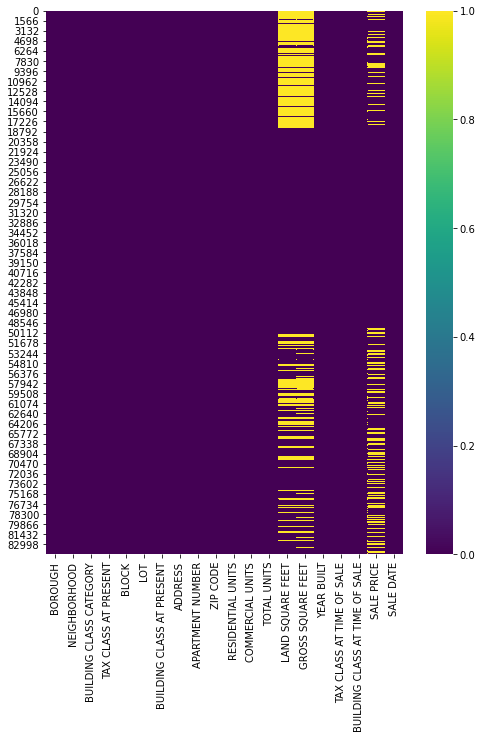

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,10))
sns.heatmap(hsales.isnull(),cmap='viridis')

In [59]:
# let us check for outliers first
hsales[['LAND SQUARE FEET','GROSS SQUARE FEET']].describe()

,LAND SQUARE FEET,GROSS SQUARE FEET
count,5.829600e+04,5.693600e+04
mean,3.941676e+03,4.045707e+03
std,4.198397e+04,3.503249e+04
min,0.000000e+00,0.000000e+00
25%,1.650000e+03,1.046750e+03
50%,2.325000e+03,1.680000e+03
75%,3.500000e+03,2.560000e+03
max,4.252327e+06,3.750565e+06


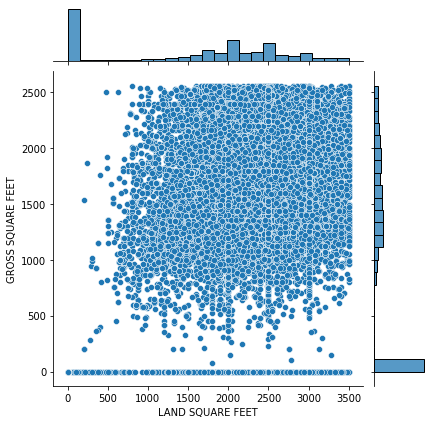

In [60]:
sns.jointplot(x='LAND SQUARE FEET', y='GROSS SQUARE FEET', data=hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)], kind='scatter')

In [61]:
hsales[(hsales['LAND SQUARE FEET']<=3500)& (hsales['GROSS SQUARE FEET']<=2560)][['LAND SQUARE FEET','GROSS SQUARE FEET']].corr()

,LAND SQUARE FEET,GROSS SQUARE FEET
LAND SQUARE FEET,1.000000,0.796219
GROSS SQUARE FEET,0.796219,1.000000


In [62]:
print(hsales[(hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull())].shape)
print(hsales[(hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [63]:
hsales['LAND SQUARE FEET'] = hsales['LAND SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].isnull()) & (hsales['GROSS SQUARE FEET'].notnull()), hsales['GROSS SQUARE FEET'])
hsales['GROSS SQUARE FEET'] = hsales['GROSS SQUARE FEET'].mask((hsales['LAND SQUARE FEET'].notnull()) & (hsales['GROSS SQUARE FEET'].isnull()), hsales['LAND SQUARE FEET'])

In [64]:
#  Check for duplicates before
print(sum(hsales.duplicated()))
hsales[hsales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)
# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False
# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


In [65]:
hsales.drop_duplicates(inplace=True)
print(sum(hsales.duplicated()))

0


In [66]:
missing = hsales.isnull().sum()/len(hsales)*100
print(pd.DataFrame([missing[missing>0],pd.Series(hsales.isnull().sum()[hsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE
percent missing          31.091033          31.091033     16.9199
how many missing      26049.000000       26049.000000  14176.0000


In [67]:
print("The number of non-null prices for missing square feet observations:\n",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].notnull())).sum())

The number of non-null prices for missing square feet observations:
 21154


In [68]:
print("non-overlapping observations that cannot be imputed:",((hsales['LAND SQUARE FEET'].isnull()) & (hsales['SALE PRICE'].isnull())).sum())


non-overlapping observations that cannot be imputed: 4895


In [69]:
hsales[hsales['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


In [70]:
# for visualization purposes, we replace borough numbering with their string names
hsales['BOROUGH'] = hsales['BOROUGH'].astype(str)
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("1", "Manhattan")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("2", "Bronx")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("3", "Brooklyn")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("4", "Queens")
hsales['BOROUGH'] = hsales['BOROUGH'].str.replace("5", "Staten Island")

In [71]:
hsales['BOROUGH'].value_counts()

Queens           26548
Brooklyn         23843
Manhattan        18102
Staten Island     8296
Bronx             6994
Name: BOROUGH, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


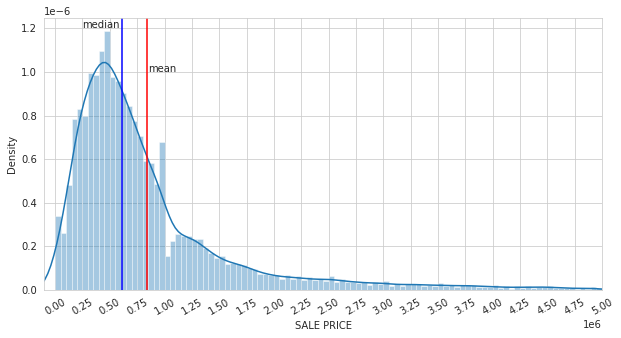

In [72]:
# house prices greater than 5 mln probably represents outliers.
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plotd = sns.distplot(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'], kde=True, bins=100)

tick_spacing=250000 # set spacing for each tick
plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plotd.set_xlim([-100000, 5000000]) # do not show negative values 
plt.xticks(rotation=30) # rotate x ticks by 30 degrees
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(hsales[(hsales['SALE PRICE']>100) & (hsales['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(250000,0.0000012, "median")
plt.text(850000,0.0000010, "mean")
plt.show()

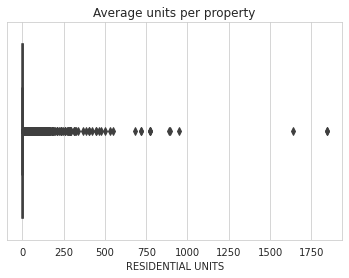

In [73]:
# The dataset seem to have lots of outliers, mainly due to commercial property sales
sns.boxplot(x='RESIDENTIAL UNITS',data=hsales)
plt.title('Average units per property')
plt.show()
#print('not included:', hsales[hsales['RESIDENTIAL UNITS']>10].shape[0], 'properties')

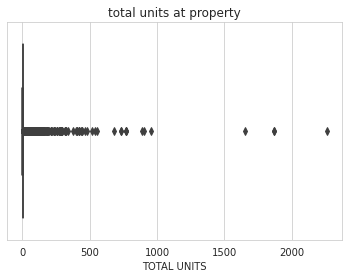

In [74]:
sns.boxplot(x='TOTAL UNITS',data=hsales)
plt.title('total units at property')
plt.show()
#print('not included:', hsales[hsales['TOTAL UNITS']>10].shape[0], 'properties')

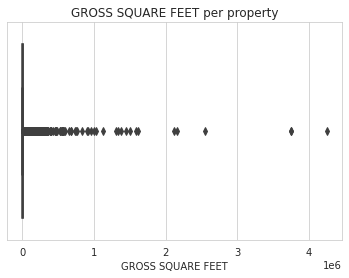

In [75]:
sns.boxplot(x='GROSS SQUARE FEET',data=hsales)
plt.title('GROSS SQUARE FEET per property')
plt.show()
#print('not included:', hsales[hsales['GROSS SQUARE FEET']>20000].shape[0], 'properties')

In [76]:
print("Uneqaul values for total units:", (hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']).sum())

Uneqaul values for total units: 2584


In [77]:
hsales[hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']]['TOTAL UNITS'].value_counts()

1      2563
2        12
3         4
117       1
9         1
24        1
14        1
4         1
Name: TOTAL UNITS, dtype: int64

In [78]:
hsales[(hsales["TOTAL UNITS"] != hsales['COMMERCIAL UNITS'] + hsales['RESIDENTIAL UNITS']) & (hsales["TOTAL UNITS"]==1)]['BUILDING CLASS CATEGORY'].value_counts()[:5]

44 CONDO PARKING                               1335
43 CONDO OFFICE BUILDINGS                       456
47 CONDO NON-BUSINESS STORAGE                   347
45 CONDO HOTELS                                 167
46 CONDO STORE BUILDINGS                        146
Name: BUILDING CLASS CATEGORY, dtype: int64

In [79]:
dataset = hsales[(hsales['COMMERCIAL UNITS']<20) & (hsales['TOTAL UNITS']<50) & (hsales['SALE PRICE']<5000000) & (hsales['SALE PRICE']>100000) & (hsales['GROSS SQUARE FEET']>0)]

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

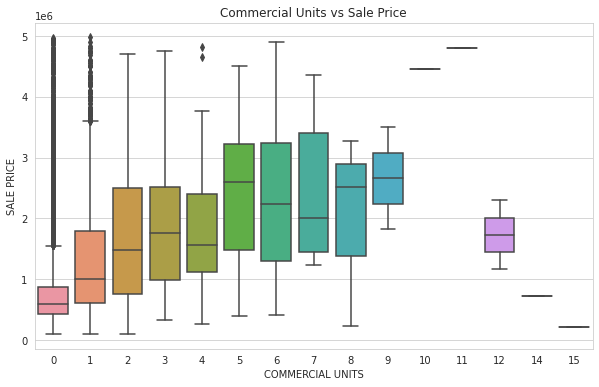

In [80]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y="SALE PRICE", data=dataset)
plt.title('Commercial Units vs Sale Price')

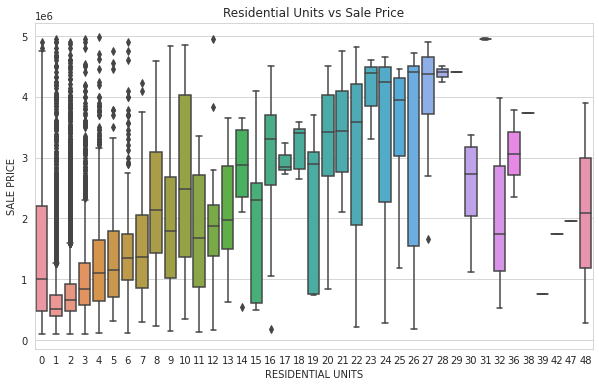

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=dataset)
plt.title('Residential Units vs Sale Price')
plt.show()

In [82]:
dataset[dataset['YEAR BUILT']<1800]['YEAR BUILT'].value_counts()

0    267
Name: YEAR BUILT, dtype: int64

In [83]:
dataset[dataset['YEAR BUILT']<1800]['BUILDING CLASS CATEGORY'].value_counts()[:15]

05 TAX CLASS 1 VACANT LAND                     171
31 COMMERCIAL VACANT LAND                       51
29 COMMERCIAL GARAGES                           21
41 TAX CLASS 4 - OTHER                          13
02 TWO FAMILY DWELLINGS                          2
03 THREE FAMILY DWELLINGS                        2
07 RENTALS - WALKUP APARTMENTS                   2
36 OUTDOOR RECREATIONAL FACILITIES               2
01 ONE FAMILY DWELLINGS                          1
06 TAX CLASS 1 - OTHER                           1
08 RENTALS - ELEVATOR APARTMENTS                 1
14 RENTALS - 4-10 UNIT                           0
18 TAX CLASS 3 - UNTILITY PROPERTIES             0
17 CONDO COOPS                                   0
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       0
Name: BUILDING CLASS CATEGORY, dtype: int64

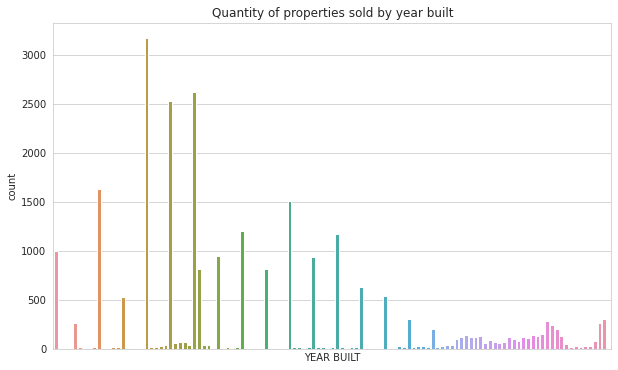

In [84]:
plt.figure(figsize=(10,6))
plotd=sns.countplot(x=dataset[dataset['YEAR BUILT']>1900]['YEAR BUILT'])
#tick_spacing=1 # set spacing for each tick
#plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plotd.set_xlim([1900, 2020])
plt.tick_params(labelbottom=False)
plt.xticks(rotation=30) 
plt.title("Quantity of properties sold by year built")
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


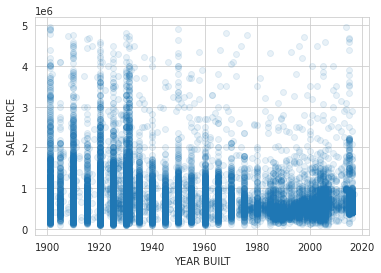

In [85]:
sns.regplot(x='YEAR BUILT', y='SALE PRICE', data=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5], fit_reg=False, scatter_kws={'alpha':0.1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


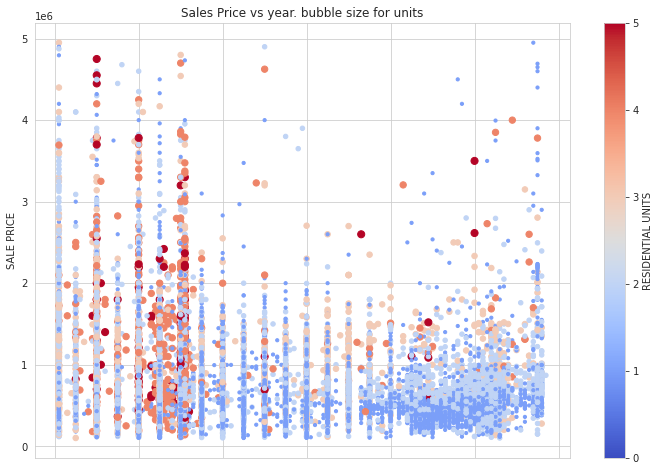

In [86]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='RESIDENTIAL UNITS', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['RESIDENTIAL UNITS']*10)
plt.title('Sales Price vs year. bubble size for units')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


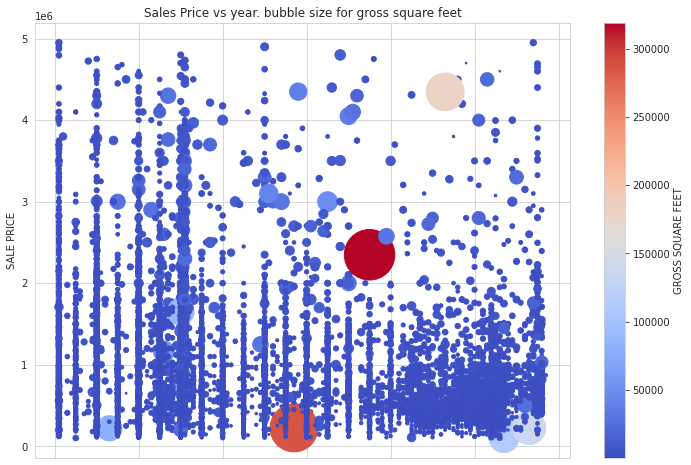

In [87]:
dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5].plot.scatter(x='YEAR BUILT', y='SALE PRICE', c='GROSS SQUARE FEET', cmap='coolwarm',figsize=(12,8),s=dataset[dataset['YEAR BUILT']>1900][dataset['RESIDENTIAL UNITS']<=5]['GROSS SQUARE FEET']*.008)
plt.title('Sales Price vs year. bubble size for gross square feet')
plt.show()

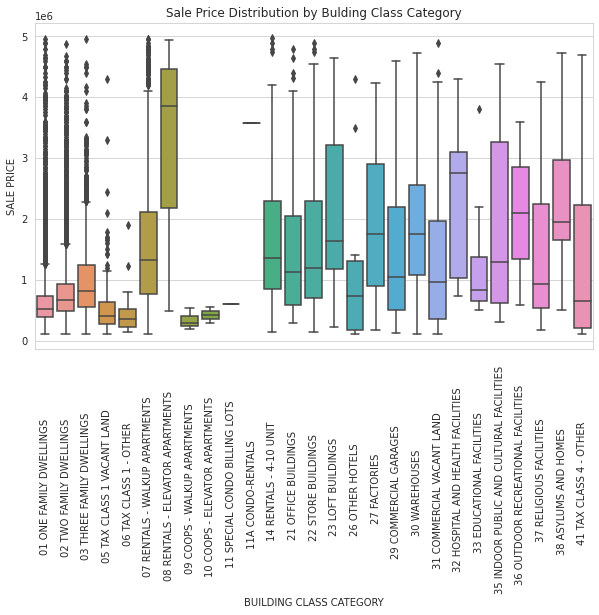

In [88]:
plt.figure(figsize=(10,6))
order = sorted(dataset['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=dataset, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

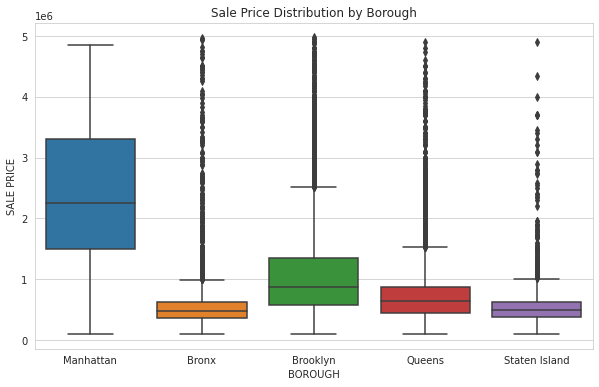

In [89]:
# Sales prices by borough
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=dataset)
plt.title('Sale Price Distribution by Borough')
plt.show()